# LAB1-Linear Regression and Stochastic Gradient Descent

##  (1) Linear Regression and Stochastic Gradient Descent
##  (2) Closed-form solution of Linear Regression
##  (3) Comparison


In [29]:
# download the dataset
import requests

r = requests.get('''https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/housing_scale''')

In [30]:
# load the dataset
from sklearn.datasets import load_svmlight_file
from io import BytesIO

x, y = load_svmlight_file(f=BytesIO(r.content), n_features=13)
x= x.toarray()

In [31]:
# preprocess the dateset
import numpy

n_samples, n_features = x.shape
x = numpy.column_stack((x, numpy.ones((n_samples, 1))))
y = y.reshape((-1, 1))

In [32]:
# devide the dataset into traning set and validation set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [33]:
#initialze the parameters and the losses sets
penalty_factor = 0.5  # L2 regular term coefficients
learning_rate = 0.0005
max_epoch = 200

losses_train = []
losses_test = []

In [34]:
# select different initializing method
w = numpy.zeros((n_features + 1, 1))  # initialize with zeros
#w = numpy.random.random((n_features + 1, 1))  # initialize with random numbers
#w = numpy.random.normal(1, 1, size=(n_features + 1, 1))  # initialize with zero normal distribution

## (1) Linear Regression and Stochastic Gradient Descent

In [35]:
for epoch in range(max_epoch):
    # calculate the gradient 
    G= (-numpy.dot(numpy.transpose(x_train),y_train)+numpy.dot(numpy.dot(numpy.transpose(x_train),x_train),w))/(n_features+1)
    G = -G
    w += learning_rate * G  # update the parameters
    
    Y_predict = numpy.dot(x_train, w)  # predict under the train set
    loss_train=penalty_factor*numpy.average(numpy.dot(y_train-Y_predict,numpy.transpose(y_train-Y_predict)))
    losses_train.append(loss_train)

    Y_predict = numpy.dot(x_test, w)  # predict under the validation set
    loss_test = penalty_factor*numpy.average(numpy.dot(y_test-Y_predict,numpy.transpose(y_test-Y_predict)))
    losses_test.append(loss_test)

print(losses_train[0])
print(losses_test[0])
    
print(losses_train[len(losses_train)-1])
print(losses_test[len(losses_test)-1])

219.67849370889007
231.59647054171768
0.10066842602334752
0.21471788009638246


Text(0.5,1,'The graph of absolute diff value varing with the number of iterations')

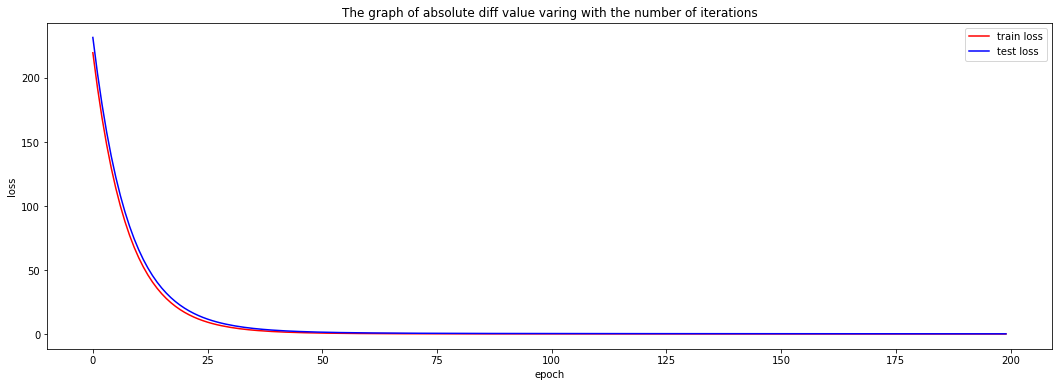

In [36]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))
plt.plot(losses_train, "-", color="r", label="train loss")
plt.plot(losses_test, "-", color="b", label="test loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title("The graph of absolute diff value varing with the number of iterations")

## (2) Closed-form solution of Linear Regression

In [37]:
w=numpy.dot(numpy.dot(numpy.linalg.inv(numpy.dot(numpy.transpose(x_train),x_train)),numpy.transpose(x_train)),y_train)

Y_predict = numpy.dot(x_train, w)  # predict under the train set
loss_train=numpy.average(numpy.dot(y_train-Y_predict,numpy.transpose(y_train-Y_predict)))

Y_predict = numpy.dot(x_test, w)  # predict under the validation set
loss_test = numpy.average(numpy.dot(y_test-Y_predict,numpy.transpose(y_test-Y_predict)))

print("Final loss for training set: ",loss_train)
print("Final loss for test set: ",loss_test)


Final loss for training set:  5.19398968642731e-19
Final loss for test set:  0.02691910042021025


## (3) Comparison

In [38]:

print("Final loss \t Closed-form\t         Gradient Descent")
print("training set\t",loss_train,"\t",losses_train[len(losses_train)-1])
print("test set    \t",loss_test,"\t",losses_test[len(losses_test)-1])


Final loss 	 Closed-form	         Gradient Descent
training set	 5.19398968642731e-19 	 0.10066842602334752
test set    	 0.02691910042021025 	 0.21471788009638246
